## Time series Research

Status: WIP

@Prepared by Anujay Saraf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('AirPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [3]:
from datetime import datetime
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [6]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [7]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [8]:
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [9]:
#All rows of 1962:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

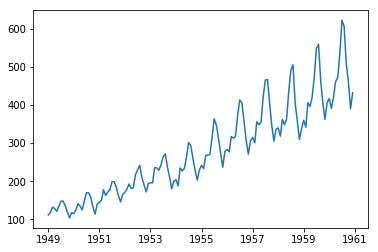

In [10]:
plt.plot(ts)

It’s clear from the plot that there is an overall increase in the trend and with some seasonality in it.

### STATIONARITY

#### Stationarity testing 

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #ts_log = np.log(ts)
    #rolmean = ts_log.rolling(12).mean()
    rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = ts_log.rolling(12).std()
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


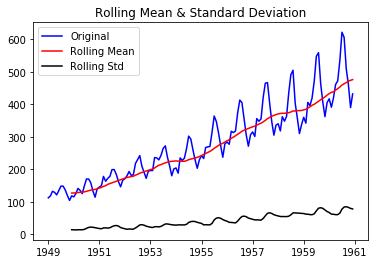

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [12]:
test_stationarity(ts)

### MAKING THE TIME SERIES STATIONARY

#### TREND 

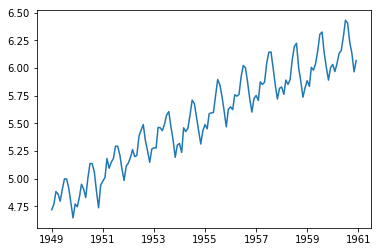

In [13]:
ts_log = np.log(ts)
plt.plot(ts_log)

##### Smoothing 

###### Moving average

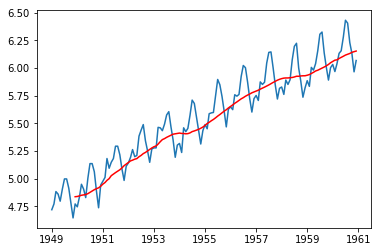

In [14]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [15]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [16]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


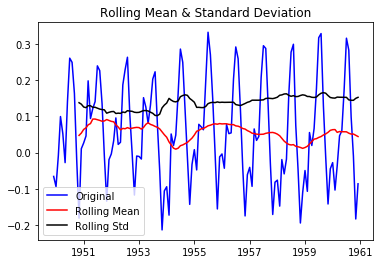

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [17]:
test_stationarity(ts_log_moving_avg_diff)

###### Smoothing Exponentially weighted moving average

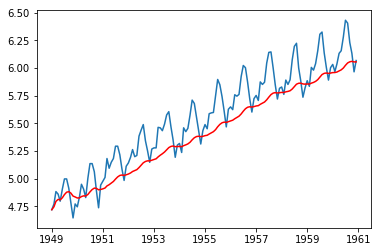

In [18]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


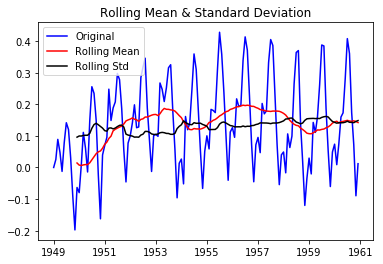

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

#### SEASONALITY (ALONG WITH TREND) 

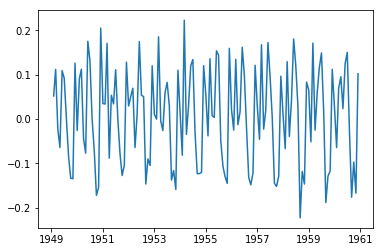

In [20]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [21]:
ts_log_diff.isnull().sum()

1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


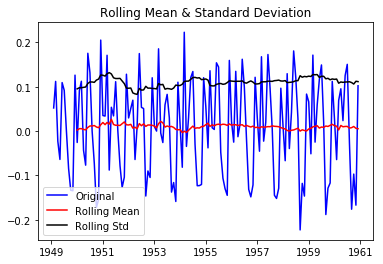

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [22]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

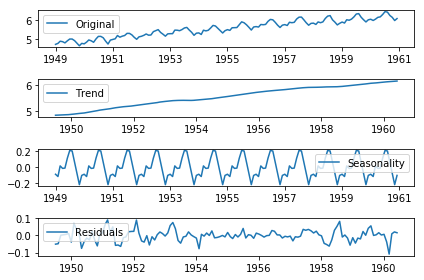

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


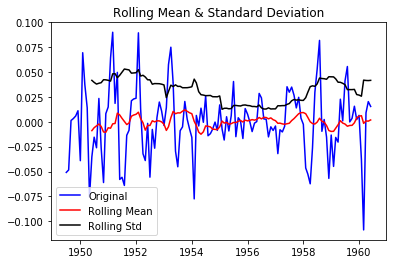

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### ACF & PACF  

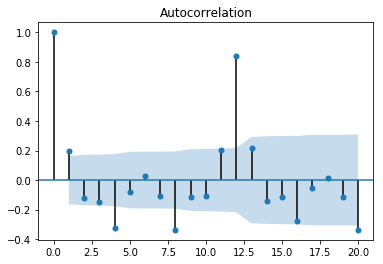

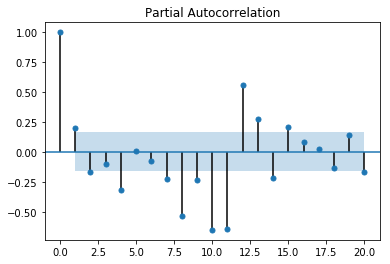

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_log_diff, lags =20)
plot_pacf(ts_log_diff, lags =20)

plt.show()

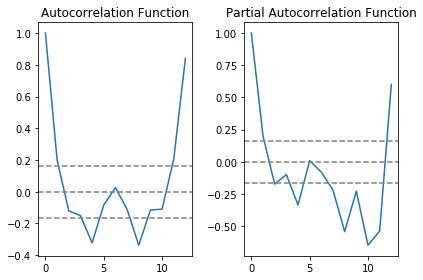

In [26]:
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMAX modelling

The Mechanics of ARIMAX
Mechanically, ARIMAX and ARIMA do not differ. In fact in StatsModels (and other software), we don’t even make a distinction between the two models. They are so similar that making a distinction is almost petty. Yet, the distinction exists, you can go look it up. So the question is why?

The answer is that by trying to combine two time-series in a regression opens you up to all kinds of new mistakes that you can make. Yeah, univariate time-series analysis has different things, like ensuring that your time-series is stationary. But multivariate time-series you start entering the weird world of causality bending. (Causality bending is my own term for what is going on here). Let’s point out the basic rules of causality.

Here are the rules:

A cause can generate an effect at the same time that the cause happens. (Things can happen contemporaneously.)
A cause can generate an effect that happens after the cause. (The present can affect the future.)
A cause that has already happened can generate an affect in the future. (The past can affect the future)
An effect cannot precede a cause. (The future does not affect the present nor the past.)
Speeding weasels can not go faster than the speed of light. (If going faster than the speed of light is possible, all of these rules will cease to exist.)
These rules of causality form the basis of why ARIMAX deserves to be designated separately from ARIMA, at least in my mind. You see, if you violate any of these rules with your ARIMAX model, it automatically invalidates that model.

In [49]:
df_sale=pd.read_csv('salesdata2.csv')

In [50]:
df_sale.head()

,Month,Marketing,Sales
0,1,107.284347,123.819229
1,2,214.523447,267.318463
2,3,327.159934,482.107206
3,4,437.384597,762.756909
4,5,518.389038,997.734857


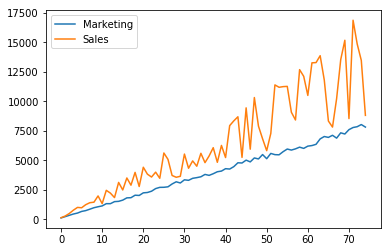

In [51]:
df_sale[['Marketing','Sales']].plot()
plt.show()

In [46]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(df_sale['Marketing']))
print(sm.tsa.stattools.adfuller(df_sale['Sales']))

(0.1197355690017587, 0.9673829869360325, 1, 73, {'1%': -3.5232835753964475, '5%': -2.902030597326081, '10%': -2.5883710883843123}, 788.4679673490132)
(-0.3515085974689576, 0.9178857330152572, 11, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 1117.9090016166876)


In [47]:
df_sale.index=pd.to_datetime(df_sale['Month'])

In [32]:
df_sale['const']=1

In [34]:
model1=sm.OLS(endog=df_sale['Sales'],exog=df_sale[['Marketing','const']])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     403.9
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           1.79e-31
Time:                        16:52:34   Log-Likelihood:                -661.83
No. Observations:                  75   AIC:                             1328.
Df Residuals:                      73   BIC:                             1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Marketing      1.7029      0.085     20.096      0.0

In [35]:
df_sale['diffS']=df_sale['Sales'].diff()
df_sale['diffM']=df_sale['Marketing'].diff()
model2=sm.OLS(endog=df_sale['diffS'].dropna(),exog=df_sale[['diffM','const']].dropna())
results2=model2.fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                  diffS   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.708
Date:                Wed, 26 Dec 2018   Prob (F-statistic):              0.104
Time:                        16:52:40   Log-Likelihood:                -671.02
No. Observations:                  74   AIC:                             1346.
Df Residuals:                      72   BIC:                             1351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
diffM          2.6104      1.586      1.646      0.1

In [37]:
#%%
print(sm.tsa.stattools.grangercausalitytests(df_sale[['Marketing','Sales']].dropna(),1))

df_sale['lag']=df_sale['diffM'].shift()
df_sale.dropna(inplace=True)
model3=sm.tsa.ARIMA(endog=df_sale['Sales'],exog=df_sale[['lag']],order=[1,1,0])
results3=model3.fit()
print(results3.summary())


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2991  , p=0.5862  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=0.3121  , p=0.5764  , df=1
likelihood ratio test: chi2=0.3114  , p=0.5768  , df=1
parameter F test:         F=0.2991  , p=0.5862  , df_denom=69, df_num=1
{1: ({'ssr_ftest': (0.29906772609907656, 0.5862317779771795, 69.0, 1), 'ssr_chi2test': (0.3120706707120799, 0.5764123100962482, 1), 'lrtest': (0.3113963123232679, 0.5768246136797509, 1), 'params_ftest': (0.2990677260988149, 0.5862317779773486, 69.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002241DFE9320>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002241DFF79E8>, array([[0., 1., 0.]])])}
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   71
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -63

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


In [38]:
print("Result of Granger Causality",sm.tsa.stattools.grangercausalitytests(df_sale[['Sales','Marketing']].dropna(),1))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=31.4214 , p=0.0000  , df_denom=68, df_num=1
ssr based chi2 test:   chi2=32.8076 , p=0.0000  , df=1
likelihood ratio test: chi2=26.9700 , p=0.0000  , df=1
parameter F test:         F=31.4214 , p=0.0000  , df_denom=68, df_num=1
Result of Granger Causality {1: ({'ssr_ftest': (31.421404606986368, 4.0988190605885894e-07, 68.0, 1), 'ssr_chi2test': (32.80764304552988, 1.017440182031814e-08, 1), 'lrtest': (26.97004036160979, 2.0663355706396597e-07, 1), 'params_ftest': (31.421404606986684, 4.098819060588146e-07, 68.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002241DFE4F28>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002241DFE4630>, array([[0., 1., 0.]])])}


## SARIMAX Process

In [52]:
df=pd.read_csv('salesdata2.csv')

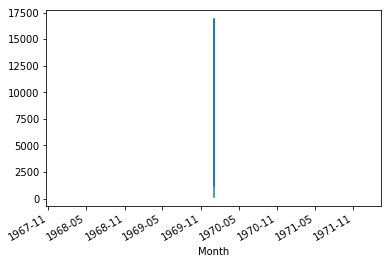

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


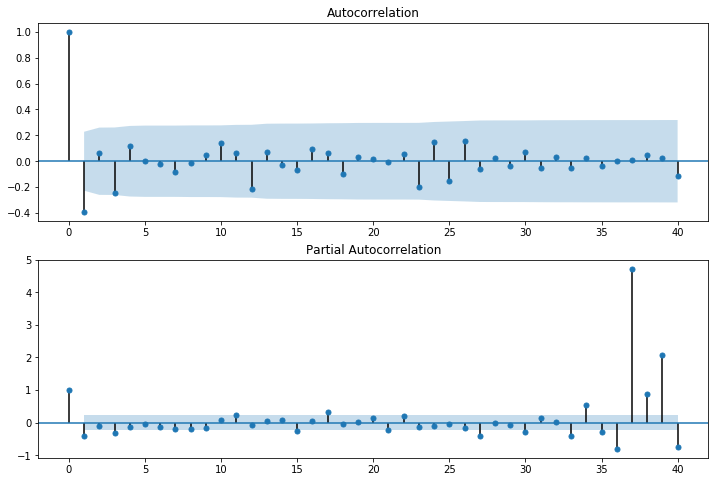

Month
1970-01-01 00:00:00.000000001             NaN
1970-01-01 00:00:00.000000002             NaN
1970-01-01 00:00:00.000000003             NaN
1970-01-01 00:00:00.000000004             NaN
1970-01-01 00:00:00.000000005             NaN
1970-01-01 00:00:00.000000006             NaN
1970-01-01 00:00:00.000000007             NaN
1970-01-01 00:00:00.000000008             NaN
1970-01-01 00:00:00.000000009             NaN
1970-01-01 00:00:00.000000010             NaN
1970-01-01 00:00:00.000000011             NaN
1970-01-01 00:00:00.000000012             NaN
1970-01-01 00:00:00.000000013             NaN
1970-01-01 00:00:00.000000014     -522.957972
1970-01-01 00:00:00.000000015     1071.096250
1970-01-01 00:00:00.000000016     -919.332078
1970-01-01 00:00:00.000000017      780.833946
1970-01-01 00:00:00.000000018     -581.611010
1970-01-01 00:00:00.000000019      824.496454
1970-01-01 00:00:00.000000020    -1364.312435
1970-01-01 00:00:00.000000021     1588.333723
1970-01-01 00:00:00.00000002

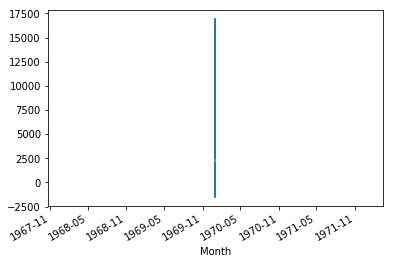

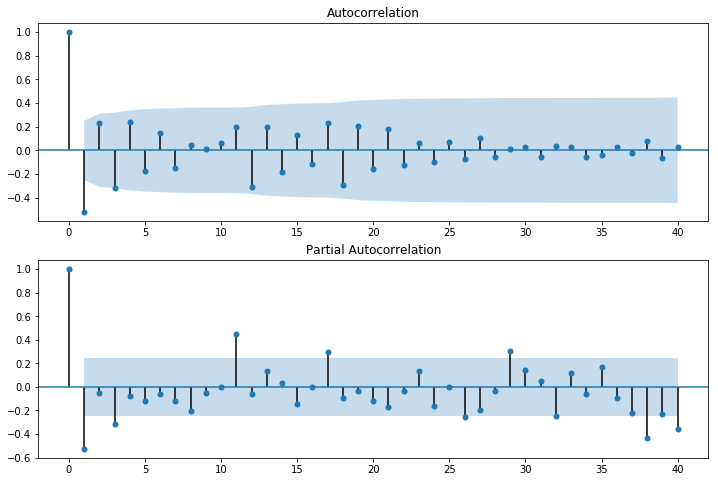

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                             Sales2   No. Observations:                   75
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -583.660
Date:                            Thu, 27 Dec 2018   AIC                           1173.320
Time:                                    16:54:16   BIC                           1179.701
Sample:                                01-01-1970   HQIC                          1175.825
                                     - 01-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -160.9794    398.319     -0.404      0.686    -941.670     619.711
ar.L1         -0.5570      0.097   

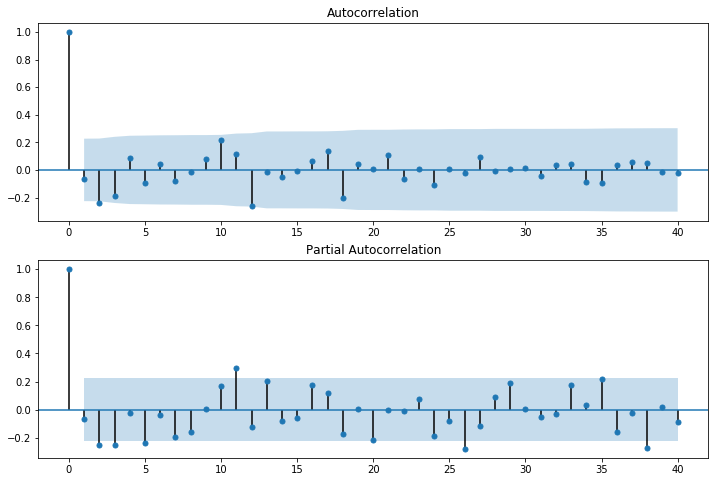

TypeError: Empty 'DataFrame': no numeric data to plot

In [54]:
df.index=pd.to_datetime(df['Month'])
df['Sales'].plot()
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'].diff().dropna(), lags=40, ax=ax2)
plt.show()

#To show you why it will return an error use this code:
print(df['Sales'].diff().diff(12))
#%%
np.random.seed(5967)
noise=[np.random.normal(scale=500)]

for i in range(len(df)-1):
    noise.append(np.random.normal(scale=500)+noise[i]*(-0.85))
df['Sales2']=df['Sales']+noise
df['Sales2'].plot()
plt.show()



#%%
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales2'].diff().diff(12).dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales2'].diff().diff(12).dropna(), lags=40, ax=ax2)
plt.show()

model=sm.tsa.statespace.SARIMAX(endog=df['Sales2'],order=(1,1,0),seasonal_order=(0,1,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())
#%%
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

df['noise']=noise
results.resid.loc['2008-02-01':].plot(label='Regression Residuals')
df['noise'].loc['2008-02-01':].plot(color='r',label='True Noise')
plt.legend(loc=2)
plt.show()

#%%
model2=sm.tsa.statespace.SARIMAX(endog=df['Sales2'],order=(1,1,0),seasonal_order=(0,1,1,12),trend='c',enforce_invertibility=False)
results2=model2.fit()
print(results2.summary())

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results2.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results2.resid, lags=40, ax=ax2)
plt.show()

df['noise']=[noise[i]+0.85*noise[i-1] if i>0 else 0 for i in range(len(noise))]
results2.resid.loc['2008-02-01':].plot(label='Regression Residuals')
df['noise'].loc['2008-02-01':].plot(color='r',label='True Noise')
plt.legend(loc=2)
plt.show()

## Holts Winter ExponentialSmoothing

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(df['Sales'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(yhat)

1970-01-01 00:00:00.000000076    12017.607592
Freq: N, dtype: float64


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


## RNN and LSTM Modelling

In [57]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [58]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('data.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


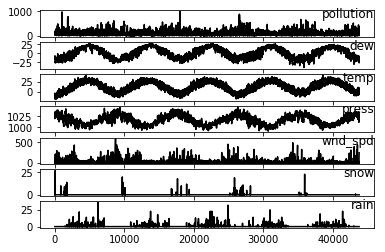

In [59]:
# generating dataset plot
from pandas import read_csv
from matplotlib import pyplot
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group],'k')
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()


In [60]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [61]:
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

(43797, 32)


In [62]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 24) 8760 (8760,)
(8760, 3, 8) (8760,) (35037, 3, 8) (35037,)


In [63]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 8760 samples, validate on 35037 samples
Epoch 1/50
 - 1s - loss: 0.0412 - val_loss: 0.0652
Epoch 2/50
 - 1s - loss: 0.0245 - val_loss: 0.0407
Epoch 3/50
 - 1s - loss: 0.0212 - val_loss: 0.0290
Epoch 4/50
 - 1s - loss: 0.0210 - val_loss: 0.0251
Epoch 5/50
 - 1s - loss: 0.0203 - val_loss: 0.0227
Epoch 6/50
 - 1s - loss: 0.0200 - val_loss: 0.0206
Epoch 7/50
 - 0s - loss: 0.0194 - val_loss: 0.0198
Epoch 8/50
 - 1s - loss: 0.0190 - val_loss: 0.0191
Epoch 9/50
 - 0s - loss: 0.0186 - val_loss: 0.0185
Epoch 10/50
 - 0s - loss: 0.0184 - val_loss: 0.0181
Epoch 11/50
 - 0s - loss: 0.0179 - val_loss: 0.0176
Epoch 12/50
 - 0s - loss: 0.0178 - val_loss: 0.0174
Epoch 13/50
 - 0s - loss: 0.0173 - val_loss: 0.0173
Epoch 14/50
 - 0s - loss: 0.0170 - val_loss: 0.0174
Epoch 15/50
 - 0s - loss: 0.0167 - val_loss: 0.0171
Epoch 16/50
 - 0s - loss: 0.0164 - val_loss: 0.0167
Epoch 17/50
 - 0s - loss: 0.0160 - val_loss: 0.0168
Epoch 18/50
 - 1s - loss: 0.0158 - val_loss: 0.0165
Epoch 19/50
 - 1s - loss

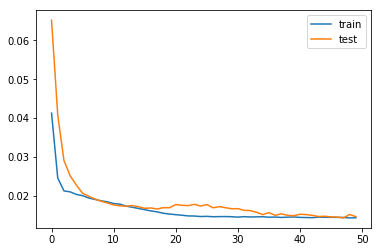

In [64]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [65]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

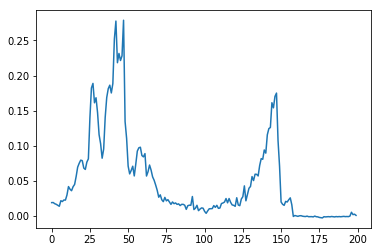

In [69]:
pyplot.plot(yhat[:200])

In [70]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [71]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.942


## Holts Winter Method

In [72]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from datetime import datetime as dt
import holtwinters as hw
from math import sqrt
from sklearn import linear_model
import numpy as np
from operator import add
import sklearn

EXAMPLE 1:

Forecasting the percent of uninsured people in the nation using Holt-Winters double exponential smoothing. 


**Holt-Winters single exponential smoothing. No trend or seasonality.** 

$$s_{i} = \alpha x_{i} + (1-\alpha)s_{i-1} \textrm{, with }0\leq \alpha \leq 1$$

- $x_{i}$ is the actual value at time $i$.
- $\alpha$ is the mixing parameter. How much new vs. old information is used. 
- $s_{i}$ is the smoothed value at time i.
- $s_{i} = \alpha\sum_{j=0}^{i} (1-\alpha)^{j}x_{i-j}$

To forecast beyond the last data point: $x_{i+h} = s_{i}$

**Holt-Winters double exponential smoothing. With trend.**

$$s_{i} = \alpha x_{i} + (1-\alpha)(s_{i-1} + t_{i-1})$$
$$t_{i} = \beta (s_{i} - s_{i-1}) + (1-\beta)t_{i-1}$$

- $t_{i}$ is the trend at time $i$. It is the difference between subsequent values in the series. 
- $\beta$ is a mixing parameter for the trend. How much new vs. old trend information to include.

To forecast beyond the last data point: $x_{i+h} = s_{i} + h t_{i}$

**Holt-Winters triple exponential smoothing. With trend and seasonality.**

$$s_{i} = \alpha (x_{i} - p_{i-k}) + (1-\alpha)(s_{i-1}+t_{i-1})$$
$$t_{i} = \beta (s_{i} - s_{i-1}) + (1-\beta)t_{i-1}$$
$$p_{i} = \gamma (x_{i} - s_{i}) + (1-\gamma)p_{i-k}$$

- $k$ is the length of the period. 
- $\gamma$ is a mixing parameter for the seasonality. 
- $s_{i}$ and $t_{i}$ are to be thought of as 'doubly-smoothed' values, without taking seasonality into account. 
- $p_{i}$ is the seasonal part. 

To forecast beyond the last data point: $x_{i+h} = s_{i} + h t_{i} + p_{i+h-k}$

**Python implementation of Holt-Winters.**

<div align="center">
<a href="http://gist.github.com/andrequeiroz/5888967">http://gist.github.com/andrequeiroz/5888967</a>
</div>

- Double exponential smoothing:
**linear(x, fc, alpha=None, beta=None)**

- Triple exponential smoothing additive:
**additive(x, m, fc, alpha=None, beta=None, gamma=None)**

- Triple exponential smoothing multiplicative:
**multiplicative(x, m, fc, alpha=None, beta=None, gamma=None)**

In [73]:
# Import the quarterly uninsured data into a dataframe. 
with open('uninsured_time_series.csv', 'rU') as f:
    reader = csv.reader(f)
    col_names = next(reader)
    rows = [(dt.strptime(row[0], '%y-%b'), float(row[1])) for row in reader]

unins_df = pd.DataFrame(rows, columns=col_names)
raw_ls = list(unins_df['uninsured_proportion'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


0.4065835024099617 1.0
0.007195808521347655 0.05795282030615561


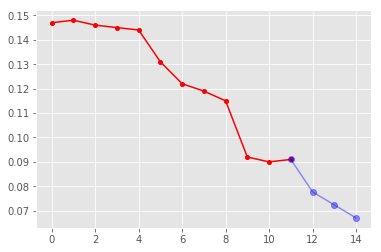

In [75]:
# Optimized parameters. 
hw_fc, alpha, beta, rmse = hw.linear(raw_ls, 3)

print(alpha, beta)
print(rmse, rmse/np.mean(raw_ls))

plt.plot(raw_ls, color='red', marker='o', markersize=4)
plt.plot([None]*(len(raw_ls)-1) + [raw_ls[-1]] +hw_fc, color='blue', marker='o', alpha=.4)


0.8 0.85
0.008311755815592101 0.06694031529335921


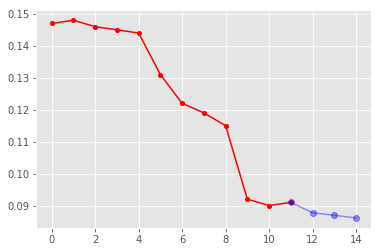

In [76]:

# Tuning parameters by hand. 
a, b = (.8, .85)
hw_fc, alpha, beta, rmse = hw.linear(raw_ls, 3, a, b)

print(alpha, beta)
print(rmse, rmse/np.mean(raw_ls))

plt.plot(raw_ls, color='red', marker='o', markersize=4)
plt.plot([None]*(len(raw_ls)-1) + [raw_ls[-1]] + hw_fc, color='blue', marker='o', alpha=.4)